In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('live.csv')


df.shape



(7050, 16)

In [14]:
df.head(20)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
5,1,217,6,0,211,5,1,0,0,0
6,3,503,614,72,418,70,10,2,0,3
7,3,295,453,53,260,32,1,1,0,1
8,1,203,1,0,198,5,0,0,0,0
9,1,170,9,1,167,3,0,0,0,0


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [10]:
df.isnull().sum()
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0  

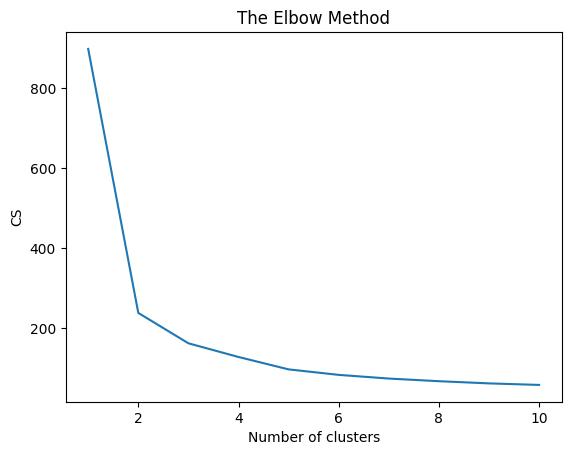

Result: 63 out of 7050 samples were correctly labeled.
Accuracy score: 0.01
Result: 138 out of 7050 samples were correctly labeled.
Accuracy score: 0.02
Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score: 0.62


In [11]:
df.info()
df.describe()

# view the labels in the variable
df['status_id'].unique()

# view how many different types of variables are there
len(df['status_id'].unique())

# view the labels in the variable
df['status_published'].unique()

# view how many different types of variables are there
len(df['status_published'].unique())

# view the labels in the variable
df['status_type'].unique()

# view how many different types of variables are there
len(df['status_type'].unique())
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

df.info()
df.head()
X = df

y = df['status_type']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)
X.info()
X.head()
cols = X.columns



from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

X.head()




from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))



kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
# check how many of the samples were correctly labeled
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))




kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
# check how many of the samples were correctly labeled
labels = kmeans.labels_
correct_labels_4 = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels_4, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels_4/float(y.size)))




In [12]:
# newx = df.iloc[:,]
# kme = KMeans(n_clusters=4)
# y_kme  = kme.fit_predict(X)

# plt.figure(figsize=(15,7))
# sns.scatterplot(X[y_kme == 0,0],X[y_kme == 0,1], color = 'yellow', label= 'class 1', s = 50)
# sns.scatterplot(X[y_kme == 1,0],X[y_kme == 1,1], color = 'red', label= 'class 2', s = 50)
# sns.scatterplot(X[y_kme == 2,0],X[y_kme == 2,1], color = 'blue', label= 'class 3', s = 50)
# sns.scatterplot(X[y_kme == 3,0],X[y_kme == 3,1], color = 'green', label= 'class 4', s = 50)
# sns.scatterplot(kme.cluster_centers_[:,0], kme.cluster_centers_[:,1], color='black', label='centroid', s = 300, marker= ',')

# plt.grid(False)
# plt.title('Clusters')
# plt.xlable('status_type')
# plt.ylabel('num_reactions')
# plt.legend()
# plt.show()

In [ ]:
single_inp  = [[1,333,0,260,150,90,0,0,0,1]]
from sklearn.cluster import KMeans
kme = KMeans(n_clusters=4)
